In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/engine_data.csv")

In [ ]:
  df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [ ]:
df.isnull().sum()

,0
Engine rpm,0
Lub oil pressure,0
Fuel pressure,0
Coolant pressure,0
lub oil temp,0
Coolant temp,0
Engine Condition,0


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [ ]:
df.describe()


,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp,engine_condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df.columns

Index(['engine_rpm', 'lub_oil_pressure', 'fuel_pressure', 'coolant_pressure',
       'lub_oil_temp', 'coolant_temp', 'engine_condition'],
      dtype='object')

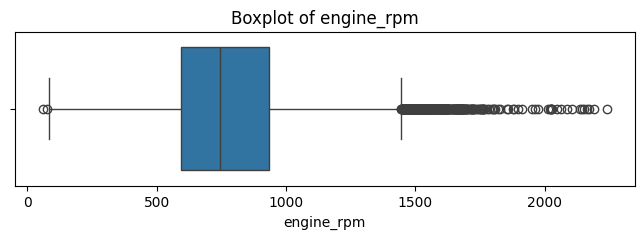

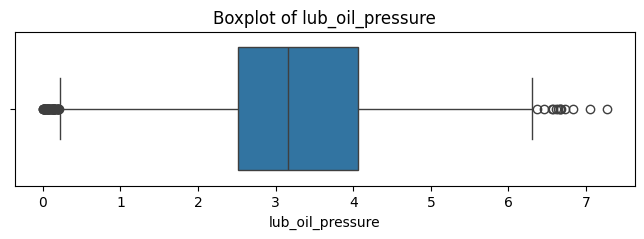

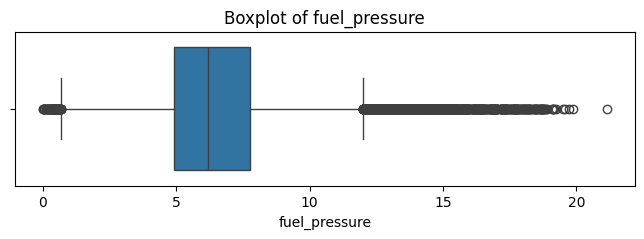

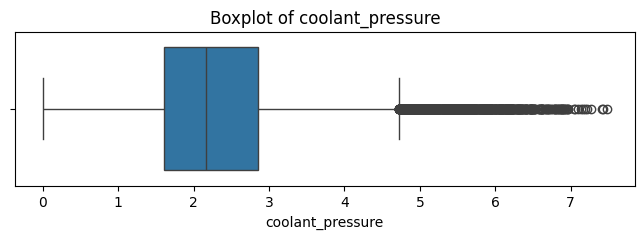

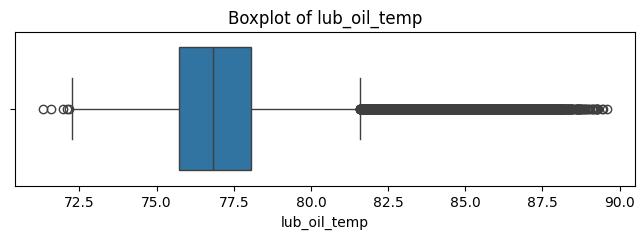

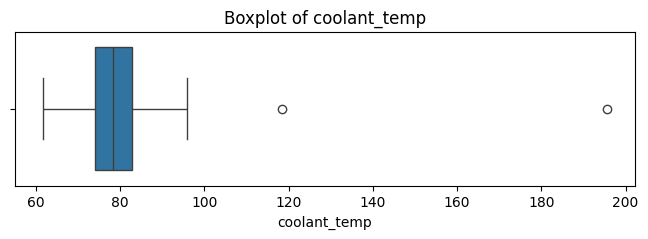

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['engine_rpm', 'lub_oil_pressure', 'fuel_pressure',
            'coolant_pressure', 'lub_oil_temp', 'coolant_temp']

for col in features:
    plt.figure(figsize=(8,2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [ ]:
df = df[(df['engine_rpm'] >= 0) & (df['engine_rpm'] <= 1600)]
df = df[(df['lub_oil_pressure'] >= 0.5) & (df['lub_oil_pressure'] <= 6)]
df = df[(df['fuel_pressure'] >= 2) & (df['fuel_pressure'] <= 10)]
df = df[(df['coolant_pressure'] >= 0.5) & (df['coolant_pressure'] <= 5)]
df = df[(df['lub_oil_temp'] >= 60) & (df['lub_oil_temp'] <= 120)]
df = df[(df['coolant_temp'] >= 60) & (df['coolant_temp'] <= 120)]


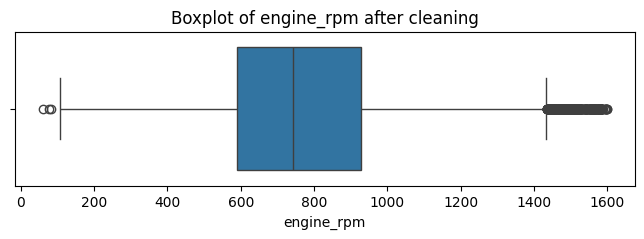

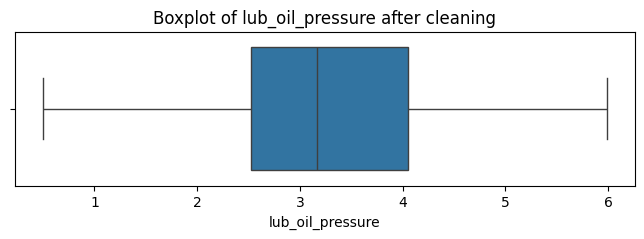

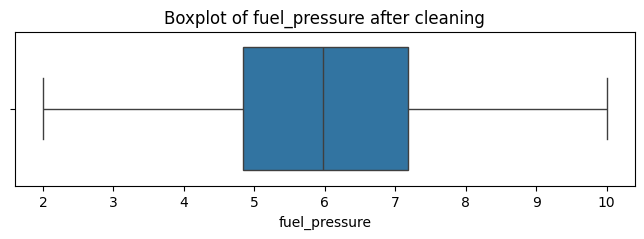

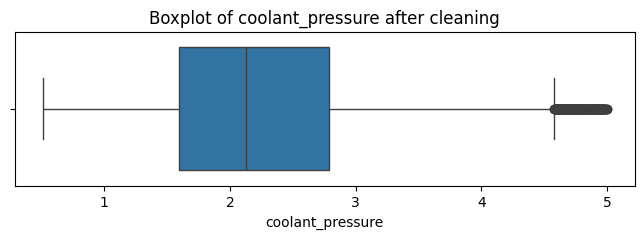

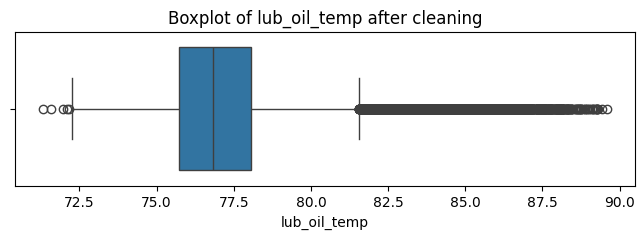

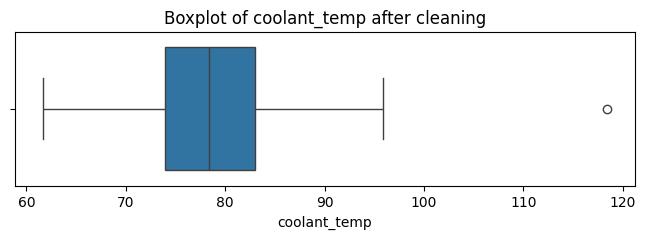

In [ ]:
for col in features:
    plt.figure(figsize=(8,2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} after cleaning')
    plt.show()



In [ ]:
df.to_csv('Clean_Vehicle_Health.csv', index=False)


In [ ]:
df['engine_condition'].value_counts()


,count
engine_condition,
1,10198
0,5962


In [ ]:
from sklearn.model_selection import train_test_split
X = df[['engine_rpm', 'lub_oil_pressure', 'fuel_pressure',
        'coolant_pressure', 'lub_oil_temp', 'coolant_temp']]

# Target
y = df['engine_condition']  # Already encoded as 0 and 1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (12928, 6)
X_test: (3232, 6)
y_train: (12928,)
y_test: (3232,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6670792079207921

Confusion Matrix:
 [[ 387  797]
 [ 279 1769]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.33      0.42      1184
           1       0.69      0.86      0.77      2048

    accuracy                           0.67      3232
   macro avg       0.64      0.60      0.59      3232
weighted avg       0.65      0.67      0.64      3232



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Accuracy: 0.5841584158415841

Confusion Matrix:
 [[ 556  628]
 [ 716 1332]]

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.47      0.45      1184
           1       0.68      0.65      0.66      2048

    accuracy                           0.58      3232
   macro avg       0.56      0.56      0.56      3232
weighted avg       0.59      0.58      0.59      3232



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.6497524752475248

Confusion Matrix:
 [[ 497  687]
 [ 445 1603]]

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.42      0.47      1184
           1       0.70      0.78      0.74      2048

    accuracy                           0.65      3232
   macro avg       0.61      0.60      0.60      3232
weighted avg       0.64      0.65      0.64      3232



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Final tuned Random Forest
rf_model_tuned = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf_model_tuned.fit(X_train, y_train)

y_pred_rf_tuned = rf_model_tuned.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_tuned))


Accuracy: 0.661509900990099

Confusion Matrix:
 [[ 446  738]
 [ 356 1692]]

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.38      0.45      1184
           1       0.70      0.83      0.76      2048

    accuracy                           0.66      3232
   macro avg       0.63      0.60      0.60      3232
weighted avg       0.64      0.66      0.64      3232



In [ ]:
X_test = X_test.copy()
X_test['Actual_Condition'] = y_test.values
X_test['Predicted_Condition_RF'] = y_pred_rf_tuned

X_test.to_csv('Vehicle_Health_RF_Predictions.csv', index=False)

In [ ]:
feat_imp = pd.Series(rf_model_tuned.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feat_imp)

feat_imp.to_csv('Feature_Importance.csv')

engine_rpm          0.351474
fuel_pressure       0.160602
lub_oil_temp        0.142924
lub_oil_pressure    0.125096
coolant_pressure    0.111570
coolant_temp        0.108335
dtype: float64
